In [ ]:
 # Mounting Google Drive for access to files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get file id to share publically
!gdown --id 1TKct8oY3eYaX4-F1wFSQ3WXiAZOQt-5I

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TKct8oY3eYaX4-F1wFSQ3WXiAZOQt-5I
To: /content/cardio.csv
100% 2.94M/2.94M [00:00<00:00, 216MB/s]


# Importing Libraries

In [ ]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations on arrays
import matplotlib.pyplot as plt  # Plotting functionality
import seaborn as sns  # Statistical data visualization
import plotly.express as px  # Interactive plotting

# About Dataset

The dataset has been procured from the following source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

**Data description**

There are 3 types of input features:
- *Objective*: Factual information;
- *Examination*: Results of medical examination;
- *Subjective*: Information given by the patient.

Features:
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


In [ ]:
# Loading dataset with ';' as the delimiter

cardio = pd.read_csv('/content/cardio.csv', delimiter=';')

In [ ]:
# Displaying the first five rows of the dataset
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
cardio.shape

(70000, 13)

In [ ]:
cardio.drop(['id'], axis =1, inplace = True);

In [ ]:
# Displaying information about the dataset
print(cardio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB
None


# Data Cleaning

In [ ]:
# check for missing value
print("The count of missing values in columns is:\n", cardio.isna().sum())
# check for duplicate value
print("\nThe count of duplicated values is:\n", cardio.duplicated().sum())

The count of missing values in columns is:
 age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

The count of duplicated values is:
 24


There are no missing values but there are duplicated values.

In [ ]:
cardio.drop_duplicates(inplace = True)

*Age Conversion from Days to Years*

In [ ]:
# Converting age in days to years
cardio['age'] = cardio['age'].apply(lambda x: np.round(x/(365)))

In [ ]:
cardio['bmi'] = cardio['weight'] / (cardio['height'] / 100) ** 2
cardio['age_group'] = pd.cut(cardio['age'], bins=[0, 30, 45, 60, 100], labels=['young', 'middle-aged', 'senior', 'old'])

def categorize_blood_pressure(row):
    if row['ap_hi'] < 90 and row['ap_lo'] < 60:
        return 'Hypotension'
    elif 90 <= row['ap_hi'] <= 120 and 60 <= row['ap_lo'] <= 80:
        return 'Normal'
    else:
        return 'Hypertension'

cardio['bp_group'] = cardio.apply(categorize_blood_pressure, axis=1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

def apply_ordinal_encoding(df, columns_and_categories):
    for column, categories in columns_and_categories.items():
        encoder = OrdinalEncoder(categories=[categories])
        df[column] = encoder.fit_transform(df[[column]])
    return df

columns_and_categories = {
    'age_group': ['young', 'middle-aged', 'senior', 'old'],
    'bp_group': ['Hypotension', 'Normal', 'Hypertension']
}

# Apply ordinal encoding using the function
cardio = apply_ordinal_encoding(cardio.copy(), columns_and_categories)
cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_group,bp_group
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,2.0,1.0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,2.0,2.0
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,2.0,2.0
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,2.0,2.0
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,2.0,1.0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,3.0,2.0
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,2.0,2.0
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,3.0,2.0


# Data Exploration v1

## Numercial and Categorical Attributes

In [ ]:
# Before feature engineering there are 5 numeric attributes and 7 categroical attributes out of 12 attributes
# numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
# categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# After feature engineering thre are 6 numeric attributes and 9 categorcial attributes out of 15 attributes and 1 categorical attribute 'cardio' is target attribute
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_group', 'bp_group']

numerical = cardio.loc[:, numerical_columns]
categorical = cardio.loc[:, categorical_columns]

## Statistical Summary

In [ ]:
# Statistical summary for all numerical attributes
stat_summary = numerical.describe()
stat_summary

,age,height,weight,ap_hi,ap_lo,bmi
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.338945,164.359152,74.208519,128.820453,96.636261,27.557610
std,6.765633,8.211218,14.397211,154.037729,188.504581,6.092210
min,30.000000,55.000000,10.000000,-150.000000,-70.000000,3.471784
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.875115
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.391837
75%,58.000000,170.000000,82.000000,140.000000,90.000000,30.222222
max,65.000000,250.000000,200.000000,16020.000000,11000.000000,298.666667


Outliers

1. The minimum weight is 10 and the minimum height is 55 but the  minimum age in all instances is 30.
2. ap_hi and aph_lo has negative values as well as very high values.

## Boxplot

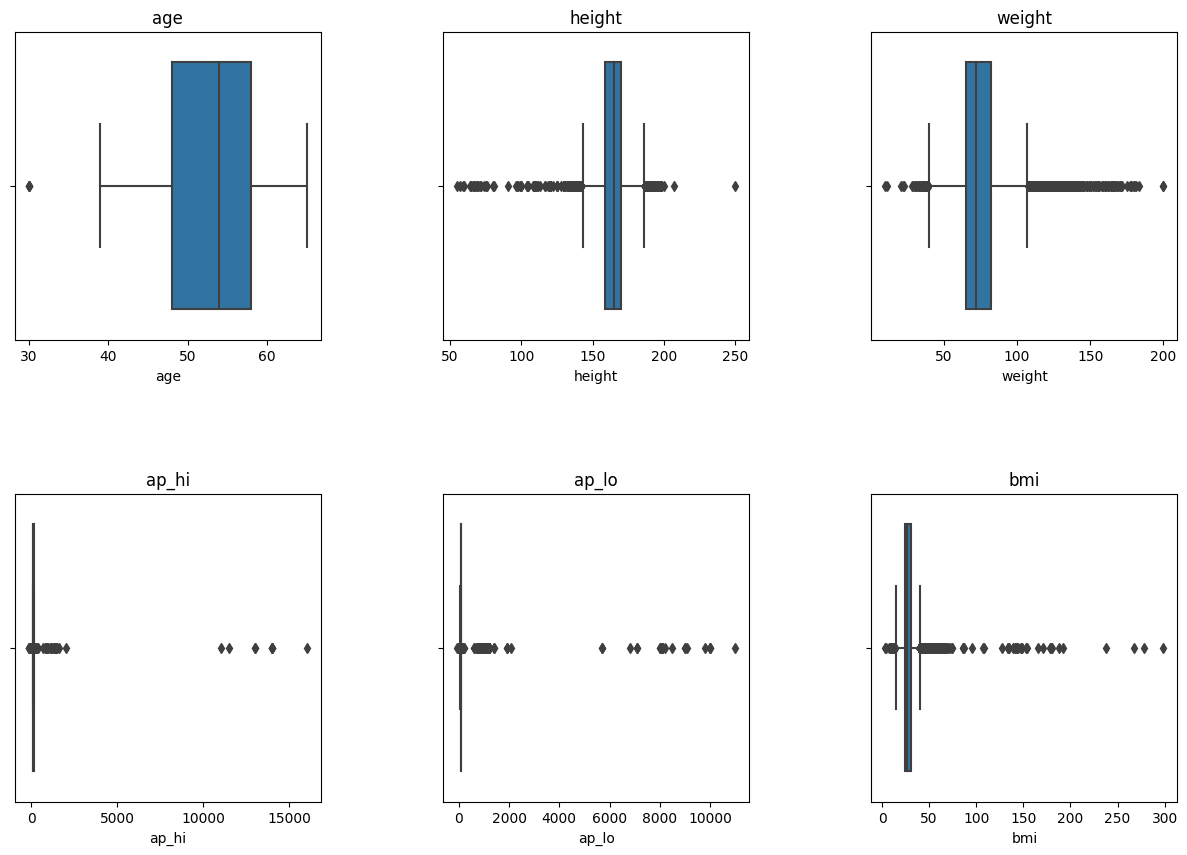

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

for i, col in enumerate(numerical.columns):
  plt.subplot(2, 3, i + 1)
  sns.boxplot(data=numerical, x=col)
  plt.title(col)

plt.show()

# Outlier Detection

**Outlier detection using Inter Quartile Range (IQR)**

In [ ]:
def detect_outliers_iqr(df, numerical_columns):
    '''
    Create a dictionary with keys as column names and values as outliers
    '''
    outliers = {}

    for column in numerical_columns:
        column_data = df[column]
        column_data_sorted = sorted(column_data)
        q1 = np.percentile(column_data_sorted, 25)
        q3 = np.percentile(column_data_sorted, 75)
        IQR = q3 - q1
        lwr_bound = q1 - (1.5 * IQR)
        upr_bound = q3 + (1.5 * IQR)

        # Identify outliers
        column_outliers = df[(df[column] < lwr_bound) | (df[column] > upr_bound)][column].tolist()
        outliers[column] = column_outliers

    return outliers

In [ ]:
outliers_dict = detect_outliers_iqr(cardio, numerical_columns)

## Replacing Outliers with Median

In [ ]:
# def replace_outliers_with_median(df):
#   for column, outliers in outliers_dict.items():
#     #Replace outliers with the median of the column
#     df[column].replace(to_replace=outliers, value=df[column].median(), inplace=True)

# replace_outliers_with_median(cardio)
# outliers_dict_after_repacling_with_median= detect_outliers_iqr(cardio, numerical_columns)
# print("\nOutliers after repacling with median:")
# print(outliers_dict_after_repacling_with_median)

## Clipping Outliers

In [ ]:
def clip_outliers_iqr(df, numerical_columns):
    '''
    Replace outliers in the specified numerical columns of the DataFrame
    with the respective lower and upper bounds using clipping
    '''
    for column in numerical_columns:
        column_data = df[column]
        column_data_sorted = sorted(column_data)
        q1 = np.percentile(column_data_sorted, 25)
        q3 = np.percentile(column_data_sorted, 75)
        IQR = q3 - q1
        lwr_bound = q1 - (1.5 * IQR)
        upr_bound = q3 + (1.5 * IQR)

        # Replace outliers with the respective lower and upper bounds using clipping
        df.loc[:, column] = df[column].clip(lower=lwr_bound, upper=upr_bound)

    return df

In [ ]:
# Clip outliers in the specified numerical columns and update the cardio DataFrame
cardio = clip_outliers_iqr(cardio, numerical_columns)

# Print outliers after clipping
outliers_dict_after_clipping = detect_outliers_iqr(cardio, numerical_columns)
print("\nOutliers after clipping:")
print(outliers_dict_after_clipping)


Outliers after clipping:
{'age': [], 'height': [], 'weight': [], 'ap_hi': [], 'ap_lo': [], 'bmi': []}


In [ ]:
# cardio.drop(cardio[(cardio['height'] > cardio['height'].quantile(0.975)) | (cardio['height'] < cardio['height'].quantile(0.025))].index,inplace=True)
# cardio.drop(cardio[(cardio['weight'] > cardio['weight'].quantile(0.975)) | (cardio['weight'] < cardio['weight'].quantile(0.025))].index,inplace=True)

## Further Cleaning

In [ ]:
# Check for diastolic pressure higher than systolic as it is incorrect.

print(f"Diastilic pressure is higher than systolic one in {cardio[cardio['ap_lo']> cardio['ap_hi']].shape[0]} cases")

Diastilic pressure is higher than systolic one in 112 cases


In [ ]:
# cardio = cardio[(cardio['ap_lo'] <= cardio['ap_hi'])]

# Replacing diastolic pressure higher than systolic pressure with its median
cardio['ap_lo'] = np.where(cardio['ap_lo'] > cardio['ap_hi'], cardio['ap_lo'].median(), cardio['ap_lo'])
print(f"Diastilic pressure is higher than systolic one in {cardio[cardio['ap_lo']> cardio['ap_hi']].shape[0]} cases")

Diastilic pressure is higher than systolic one in 0 cases


In [ ]:
cardio.shape

(69976, 15)

In [ ]:
# Check for negative values of systolic and dystolic blood pressure

print(f"The number of negative values of systolic and dystolic blood pressure is in {cardio[(cardio['ap_lo']<=0) | (cardio['ap_hi'] <= 0)].shape[0]} cases")

The number of negative values of systolic and dystolic blood pressure is in 0 cases


## Statistical Summary after Outliers Removal

In [ ]:
numerical = cardio.loc[:, numerical_columns]

In [ ]:
stat_summary = numerical.describe()
stat_summary

,age,height,weight,ap_hi,ap_lo,bmi
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.339116,164.407118,73.928410,126.714774,81.741025,27.376032
std,6.765079,7.826740,13.443679,16.388214,9.018323,4.868255
min,33.000000,142.500000,39.500000,90.000000,65.000000,14.354454
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.875115
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.391837
75%,58.000000,170.000000,82.000000,140.000000,90.000000,30.222222
max,65.000000,186.500000,107.500000,170.000000,105.000000,39.742883


## Boxplot after Outliers Removal

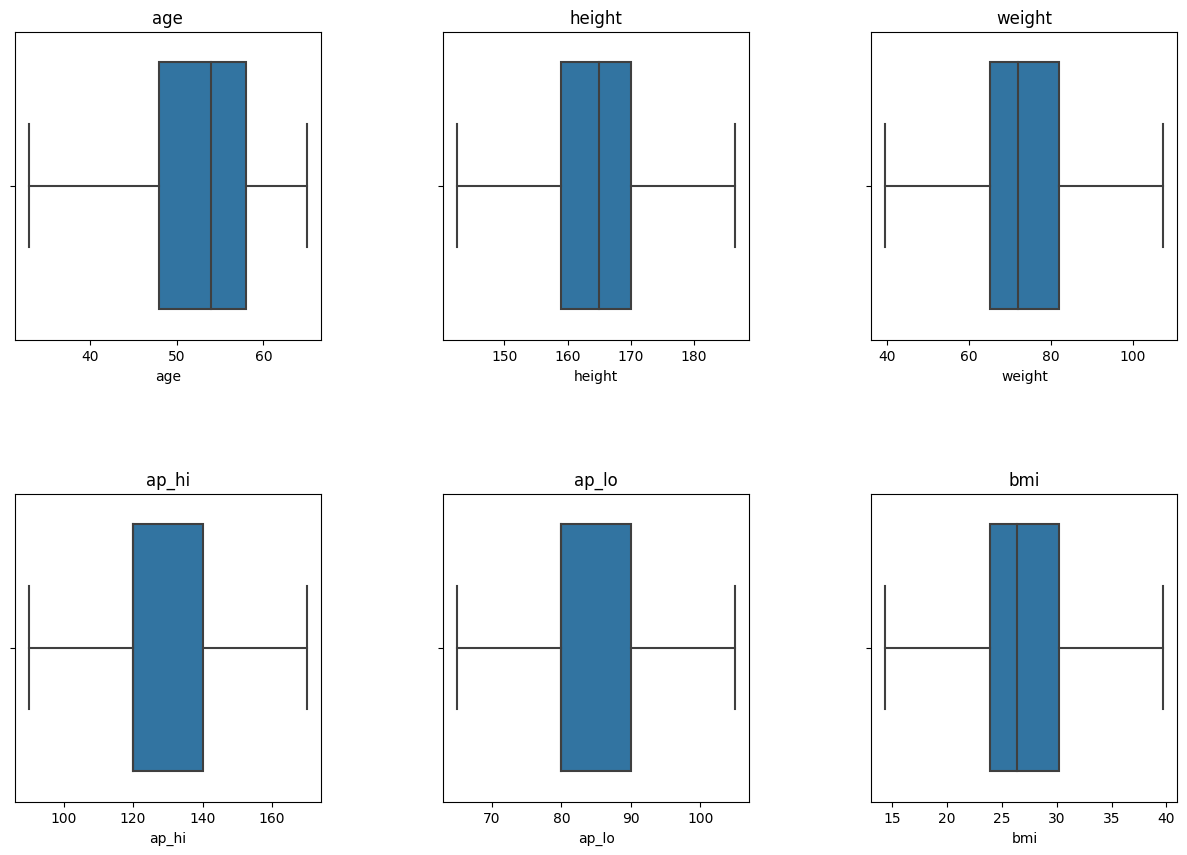

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

for i, col in enumerate(numerical.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=numerical, x=col)
    plt.title(col)

plt.show()

# Data Exploration v2

In [ ]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_group,bp_group
0,50.0,2,168.0,62.0,110,80.0,1,1,0,0,1,0,21.967120,2.0,1.0
1,55.0,1,156.0,85.0,140,90.0,3,1,0,0,1,1,34.927679,2.0,2.0
2,52.0,1,165.0,64.0,130,70.0,3,1,0,0,0,1,23.507805,2.0,2.0
3,48.0,2,169.0,82.0,150,100.0,1,1,0,0,1,1,28.710479,2.0,2.0
4,48.0,1,156.0,56.0,100,65.0,1,1,0,0,0,0,23.011177,2.0,1.0


## Histograms

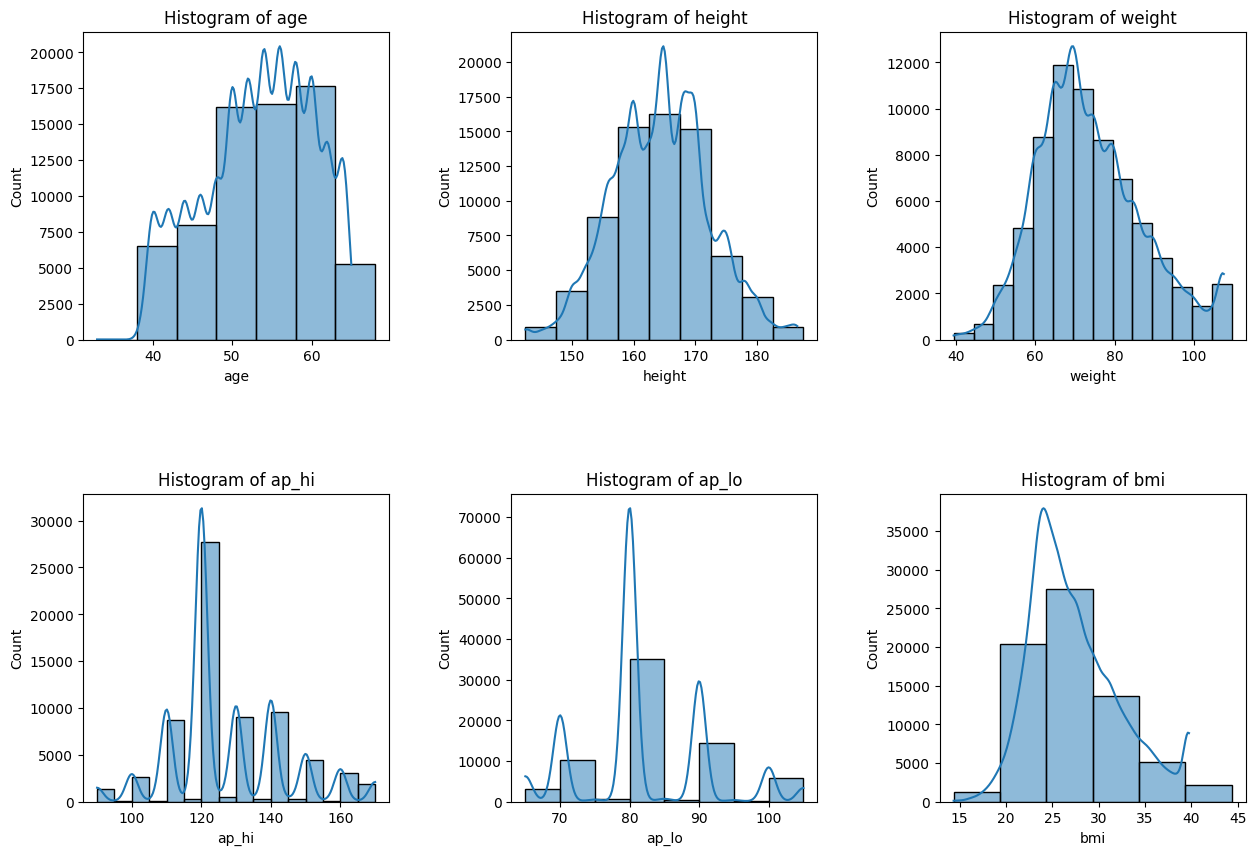

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

for i, col in enumerate(numerical.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=numerical, x=col, binwidth = 5, kde = True)
    plt.title(f"Histogram of {col}")

plt.show()

## Heatmap of Correlation Matrix

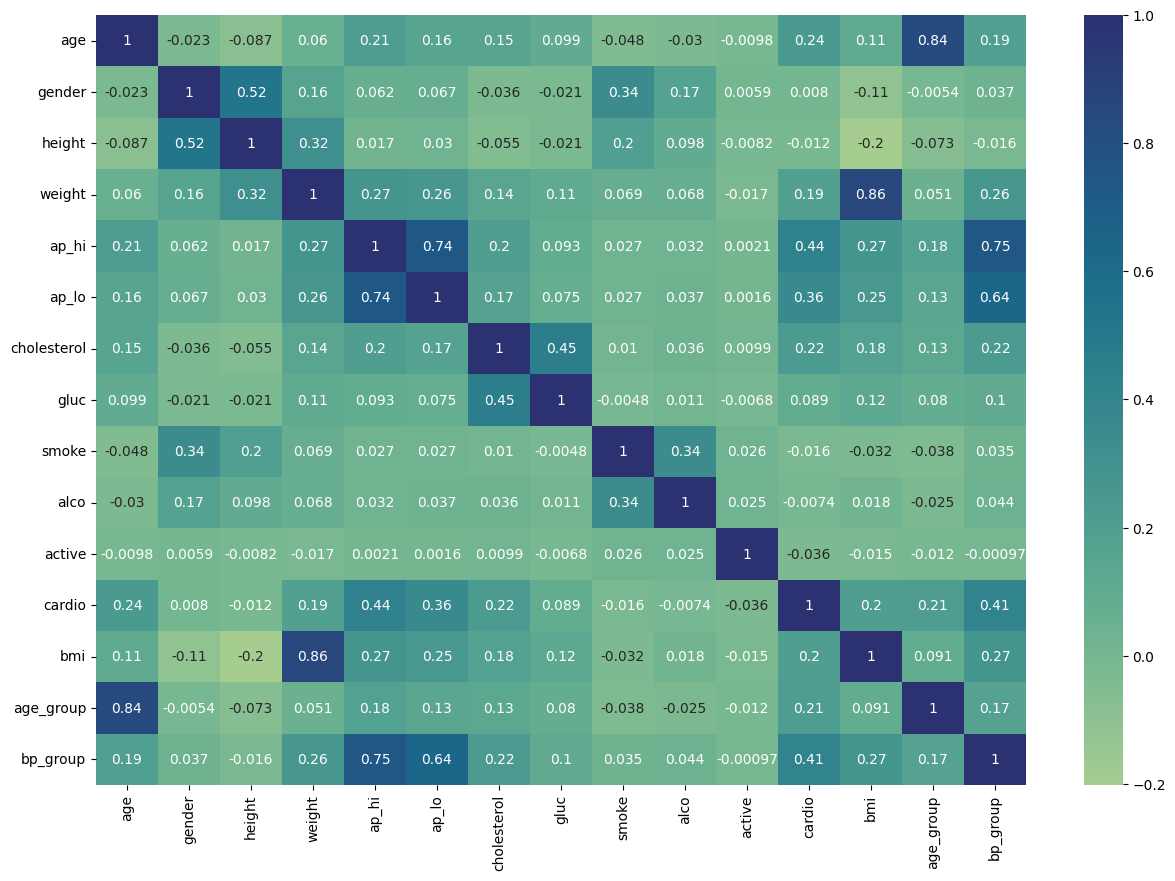

In [ ]:
# correlation_matrix = numerical.corr()
# correlation_matrix

# sns.heatmap(correlation_matrix, cmap = 'crest', annot = True)

correlation_matrix = cardio.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap = 'crest', annot = True);

## Count Plot

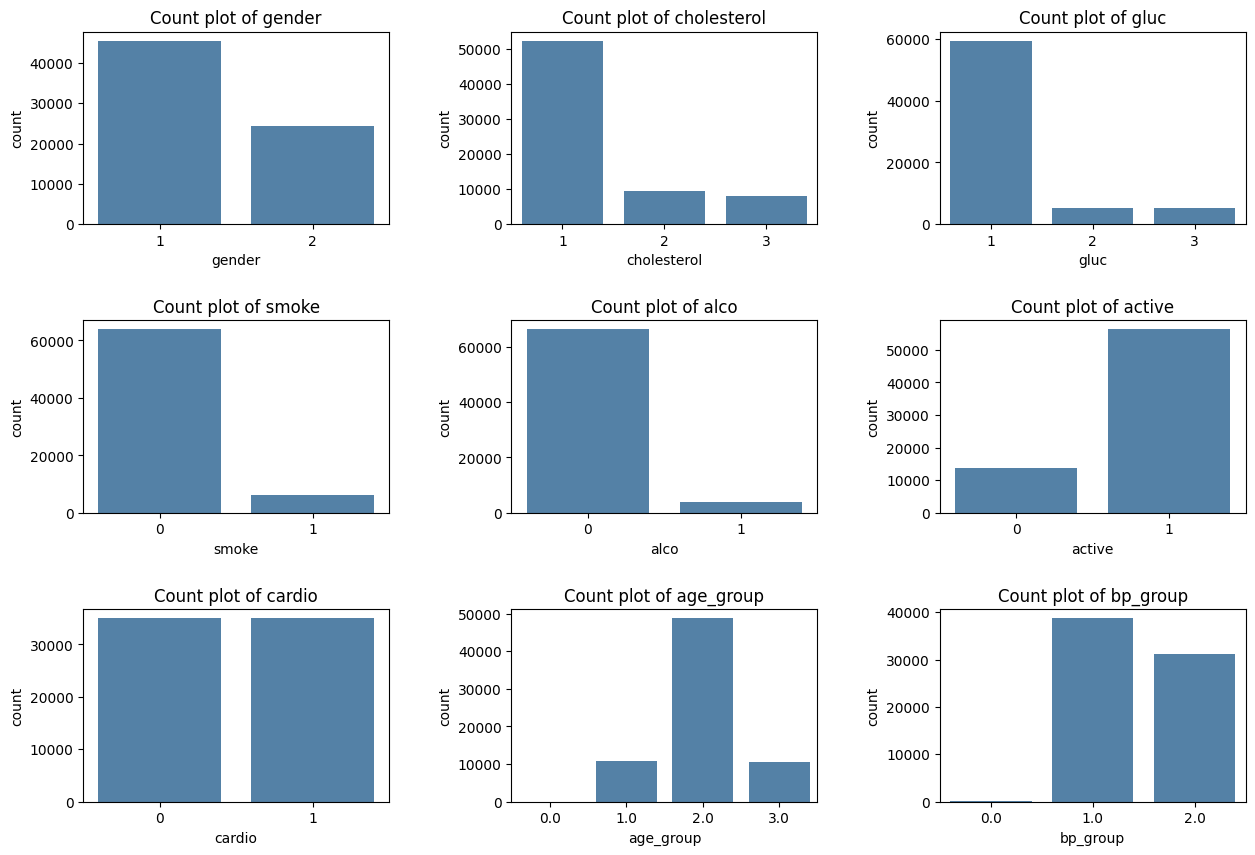

In [ ]:
# Count of all categorical attributes

plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

for i, col in enumerate(categorical.columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=categorical, x=col, color = 'steelblue')
    plt.title(f"Count plot of {col}")

plt.show()

In [ ]:
cardio.to_csv('cardio_preprocessed', index = False)